Python option pricing engine. In this file there we will price European call and put option and plot graphs for payoffs and greeks.

In [1]:
#importing the packages needed
import sys
!{sys.executable} -m pip install scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
from scipy.stats import norm
from datetime import date
import math

You should consider upgrading via the 'C:\Users\Geekerd\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
#input from user in order to get information
rf = 0.02
print(rf)
stock = input('What stock is the option on?: ')
option_type = input('Call or put?: ')
strike = float(input('Please insert the strike: '))
time_to_mat = int(input('Please insert the time to maturity in days: '))
days_for_vol = int(input ('Please insert the number of days to consider to get the historical volatiility: '))

0.02
What stock is the option on?: TSLA
Call or put?: Call
Please insert the strike: 1100
Please insert the time to maturity in days: 30
Please insert the number of days to consider to get the historical volatiility: 40


In [3]:

#insert the date
end = date.today()
start = end-dt.timedelta(days=days_for_vol)
start,end



(datetime.date(2021, 10, 4), datetime.date(2021, 11, 13))

In [4]:
#select the chosen stock from the user input
chosen_stock = [stock]
print('The selected stocks is '+ str(chosen_stock))
#get data for that stock
chosen_stock_data =pdr.get_data_yahoo(chosen_stock,start,end)
chosen_stock_data

The selected stocks is ['TSLA']


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2021-10-04,781.530029,781.530029,806.969971,776.119995,796.500000,30483300
2021-10-05,780.590027,780.590027,797.309998,774.200012,784.799988,18432600
2021-10-06,782.750000,782.750000,786.659973,773.219971,776.200012,14632800
2021-10-07,793.609985,793.609985,805.000000,783.380005,785.460022,19195800
2021-10-08,785.489990,785.489990,796.380005,780.909973,796.210022,16711100
2021-10-11,791.940002,791.940002,801.239990,785.500000,787.650024,14200300
2021-10-12,805.719971,805.719971,812.320007,796.570007,800.929993,22020000
2021-10-13,811.080017,811.080017,815.409973,805.780029,810.469971,14120100


In [5]:
#getting only the closing prices
chosen_stock_data_close = chosen_stock_data.Close
chosen_stock_data_close.head()


Symbols,TSLA
Date,
2021-10-04,781.530029
2021-10-05,780.590027
2021-10-06,782.750000
2021-10-07,793.609985
2021-10-08,785.489990


In [6]:
#statistics about the prices
chosen_stock_data_close.describe()


Symbols,TSLA
count,30.000000
mean,968.929331
std,158.548395
min,780.590027
25%,812.890015
50%,964.054993
75%,1074.767517
max,1229.910034


<AxesSubplot:xlabel='Date'>

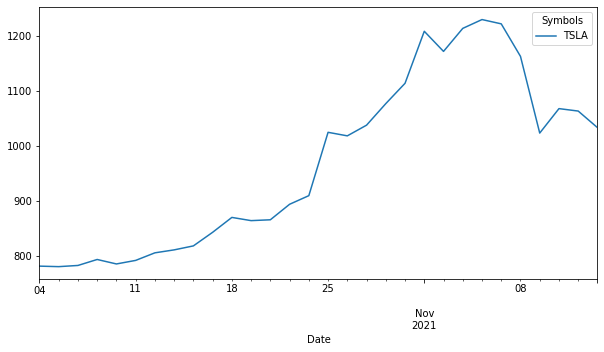

In [7]:
#plotting the closing prices
chosen_stock_data_close.plot(figsize=(10,5))

In [8]:
#getting the returns
returns =chosen_stock_data_close/chosen_stock_data_close.shift(1)-1
returns = returns.dropna()
returns

Symbols,TSLA
Date,
2021-10-05,-0.001203
2021-10-06,0.002767
2021-10-07,0.013874
2021-10-08,-0.010232
2021-10-11,0.008211
2021-10-12,0.017400
2021-10-13,0.006652
2021-10-14,0.008926
2021-10-15,0.030196


<AxesSubplot:xlabel='Date'>

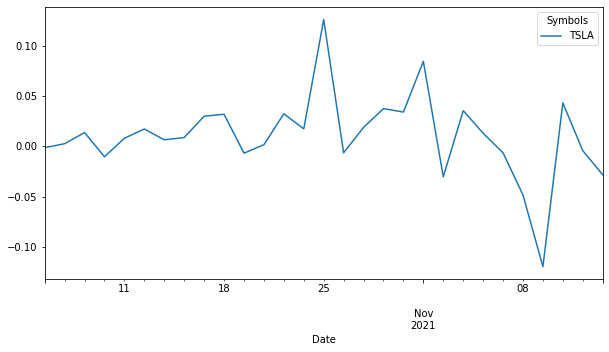

In [9]:
#plotting returns
returns.plot(figsize=(10,5))

In [10]:
#std deviation
sigma = returns.std()*np.sqrt(256)
sigma

Symbols
TSLA    0.669503
dtype: float64

In [11]:
#implementing Black Scholes model without dividends


from scipy.stats import norm

#setting the parameters for the bs model

S0= pd.DataFrame(chosen_stock_data_close).to_numpy()           #initial stock price
S0 = S0[-1]
print('The initial stock price is ' + str(S0))

K = strike
T = time_to_mat/256

#defining the equation for the options
def bs_scholes(S0,rf,K,T,sigma,option_type):
    #setting the parameters d1 and d2
    d1= (np.log(S0/K)+(rf+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2= d1-sigma*np.sqrt(T)
    try:
        if option_type == 'Call':
            price = S0*norm.cdf(d1,0,1)-K*np.exp(-rf*T)*norm.cdf(d2,0,1)
        
        elif option_type =='Put':
            price = K*np.exp(-rf*T)*norm.cdf(-d2,0,1)-S0*norm.cdf(-d1,0,1)
        return price
    except:
        print('Please insert Put or Call')

print('The option value is ' +str(bs_scholes(S0,rf,K,T,sigma,option_type)))
       
        
        

The initial stock price is [1033.42004395]
The option value is [68.50603366]


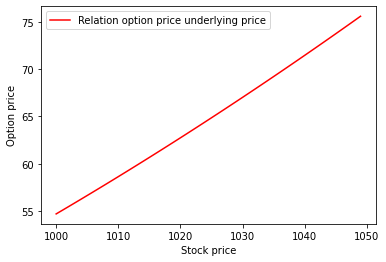

In [12]:
Stock_range = np.arange(1000,1050)
option_graph = [bs_scholes(x,rf,K,T,sigma,option_type) for x in Stock_range]

plt.plot(Stock_range,option_graph, 'r', label = "Relation option price underlying price")

plt.legend()
plt.ylabel("Option price")
plt.xlabel("Stock price")
plt.show()

In [13]:
#delta
def delta_calc(S0,rf,K,T,sigma,option_type):
    #setting the parameters d1 
    d1= (np.log(S0/K)+(rf+sigma**2/2)*T)/(sigma*np.sqrt(T))
    
    try:
        if option_type == 'Call':
            delta = norm.cdf(d1,0,1)
        
        elif option_type =='Put':
            delta = -norm.cdf(-d1,0,1)
        return delta
    except:
        print('Please insert Put or Call')

print('The option delta is ' +str(delta_calc(S0,rf,K,T,sigma,option_type)))




The option delta is [0.44132796]


In [14]:
#gamma
def gamma_calc(S0,rf,K,T,sigma,option_type):
    #setting the parameters d1 
    d1= (np.log(S0/K)+(rf+sigma**2/2)*T)/(sigma*np.sqrt(T))
    
    try:
        gamma = norm.pdf(d1,0,1)/(S0*sigma*np.sqrt(T))
        return gamma
    except:
        print('Please insert Put or Call')

print('The option gamma is ' +str(gamma_calc(S0,rf,K,T,sigma,option_type)))

The option gamma is Symbols
TSLA    0.001666
dtype: float64


In [15]:
#vega
def vega_calc(S0,rf,K,T,sigma,option_type):
    #setting the parameters d1 
    d1= (np.log(S0/K)+(rf+sigma**2/2)*T)/(sigma*np.sqrt(T))
    
    try:
        vega = S0*norm.pdf(d1,0,1)*np.sqrt(T)
        return vega
    except:
        print('Please insert Put or Call')

print('The option vega is ' +str(vega_calc(S0,rf,K,T,sigma,option_type)))

The option vega is [139.6036161]


In [16]:
#theta
def theta_calc(S0,rf,K,T,sigma,option_type):
    #setting the parameters d1 
    d1= (np.log(S0/K)+(rf+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2= d1-sigma*np.sqrt(T)
    try:
        if option_type == 'Call':
            theta = -((S0*norm.pdf(d1,0,1)*np.sqrt(T))/2*T)-rf*K*(np.exp(-rf*T))*norm.cdf(d2)
        
        elif option_type =='Put':
            theta = -((S0*norm.pdf(d1,0,1)*np.sqrt(T))/2*T)+rf*K*(np.exp(-rf*T))*norm.cdf(-d2)
        return theta
    except:
        print('Please insert Put or Call')

print('The option theta is ' +str(theta_calc(S0,rf,K,T,sigma,option_type)))

The option theta is [-15.93132192]


In [17]:
#rho
def rho_calc(S0,rf,K,T,sigma,option_type):
    #setting the parameters d1 
    d1= (np.log(S0/K)+(rf+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2= d1-sigma*np.sqrt(T)
    try:
        if option_type == 'Call':
            rho = K*T*np.exp(-rf*T)*norm.cdf(d2)
        
        elif option_type =='Put':
            rho = -K*T*np.exp(-rf*T)*norm.cdf(-d2)
        return rho
    except:
        print('Please insert Put or Call')

print('The option rho is ' +str(rho_calc(S0,rf,K,T,sigma,option_type)))

The option rho is [45.41849141]
